In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
import numpy as np

In [2]:
path_original = "../../../data/phm_data_challenge/01_M02_DC_small.csv"
df_original = pd.read_csv(path_original)

In [3]:
df_original.head()

,ID,Tool,stage,Lot,runnum,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,...,FIXTURETILTANGLE,ROTATIONSPEED,ACTUALROTATIONANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION,ongoing time,up time
0,1,01M02,1,9253,10511673,67,1,-0.079428,-0.958814,-0.959509,...,2.027848,-0.013207,-0.122437,0.0,2.39537,2.871511,3.175941,4.037785,3283834,3283834
1,2,01M02,1,9253,10511673,67,1,-0.079419,-0.958928,-0.959651,...,2.027848,-0.013207,-0.122437,0.0,2.39537,2.871511,3.175941,4.037785,3283838,3283838
2,3,01M02,1,9253,10511673,67,1,-0.079409,-0.959156,-0.960006,...,2.027848,-0.013207,-0.122437,0.0,2.39537,2.871511,3.175941,4.037785,3283842,3283842
3,4,01M02,1,9253,10511673,67,1,-0.079420,-0.958928,-0.959297,...,2.027848,-0.013207,-0.122437,0.0,2.39537,2.871511,3.175941,4.037785,3283846,3283846
4,5,01M02,1,9253,10511673,67,1,-0.079430,-0.959269,-0.959438,...,2.027848,-0.013207,-0.122437,0.0,2.39537,2.871511,3.175941,4.037785,3283850,3283850


## Hole Dataset contains 10 different recipes 

In [35]:
df_original.recipe.unique()

array([67, 68, 66, 73, 69, 71, 72, 70, 74, 76])

In [5]:
df_original.recipe.value_counts()

67    488363
66    274339
68    122744
69     28953
71     10345
74      5297
72      3883
70      2660
73      1962
76      1221
Name: recipe, dtype: int64

## Train Dataset contains only 4 different recipes

In [37]:
subset = df_original.iloc[0:50000,:]
subset .recipe.unique()

array([67, 68, 66, 73])

## Visualisation

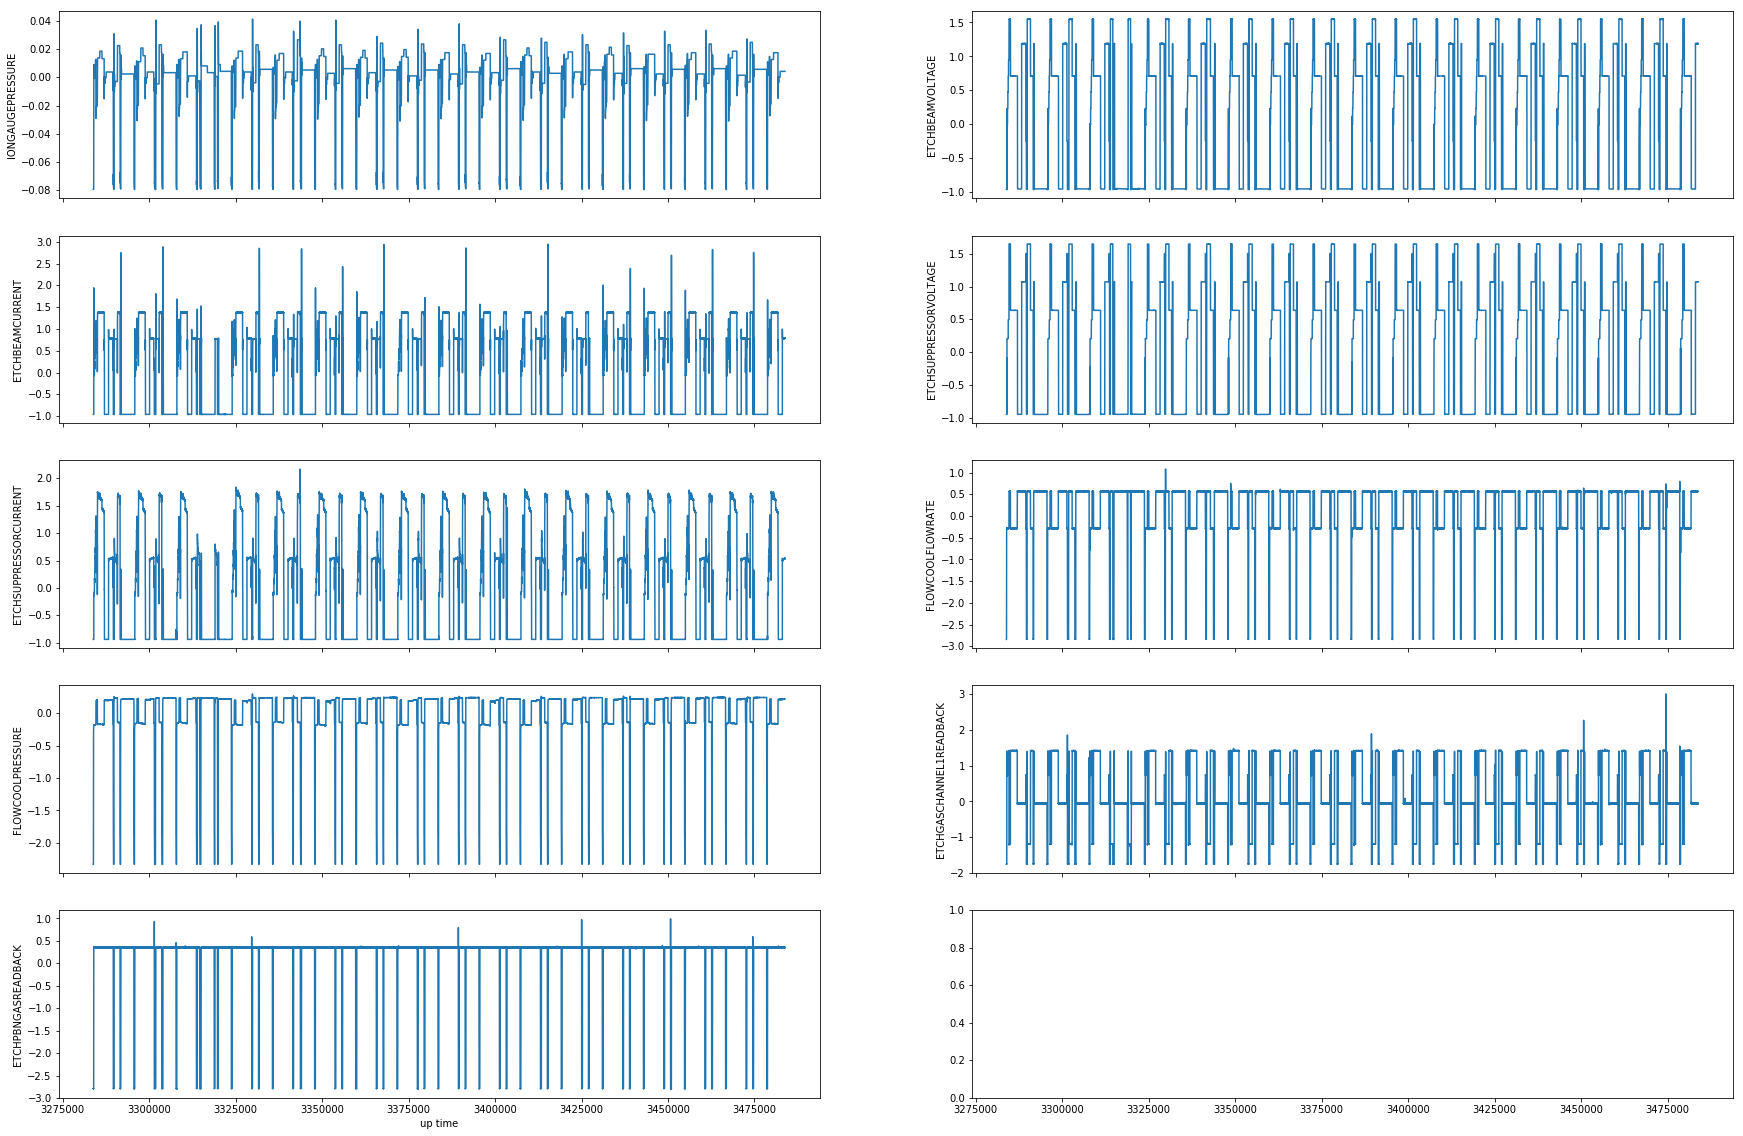

In [7]:
fig, axes = plt.subplots(5, 2, figsize=(30,20), sharex=True) # , dpi=200, 
ax = axes.ravel()
plt.subplots_adjust(hspace=0.2, wspace=0.6)
for i in range(6,16):
    sns.lineplot(x=df_original["up time"], y=df_original.iloc[:,i], ax=ax[i-7])
#plt.savefig("../graphs/raw_sensor_data.png")
#ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
#fig.tight_layout()
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()

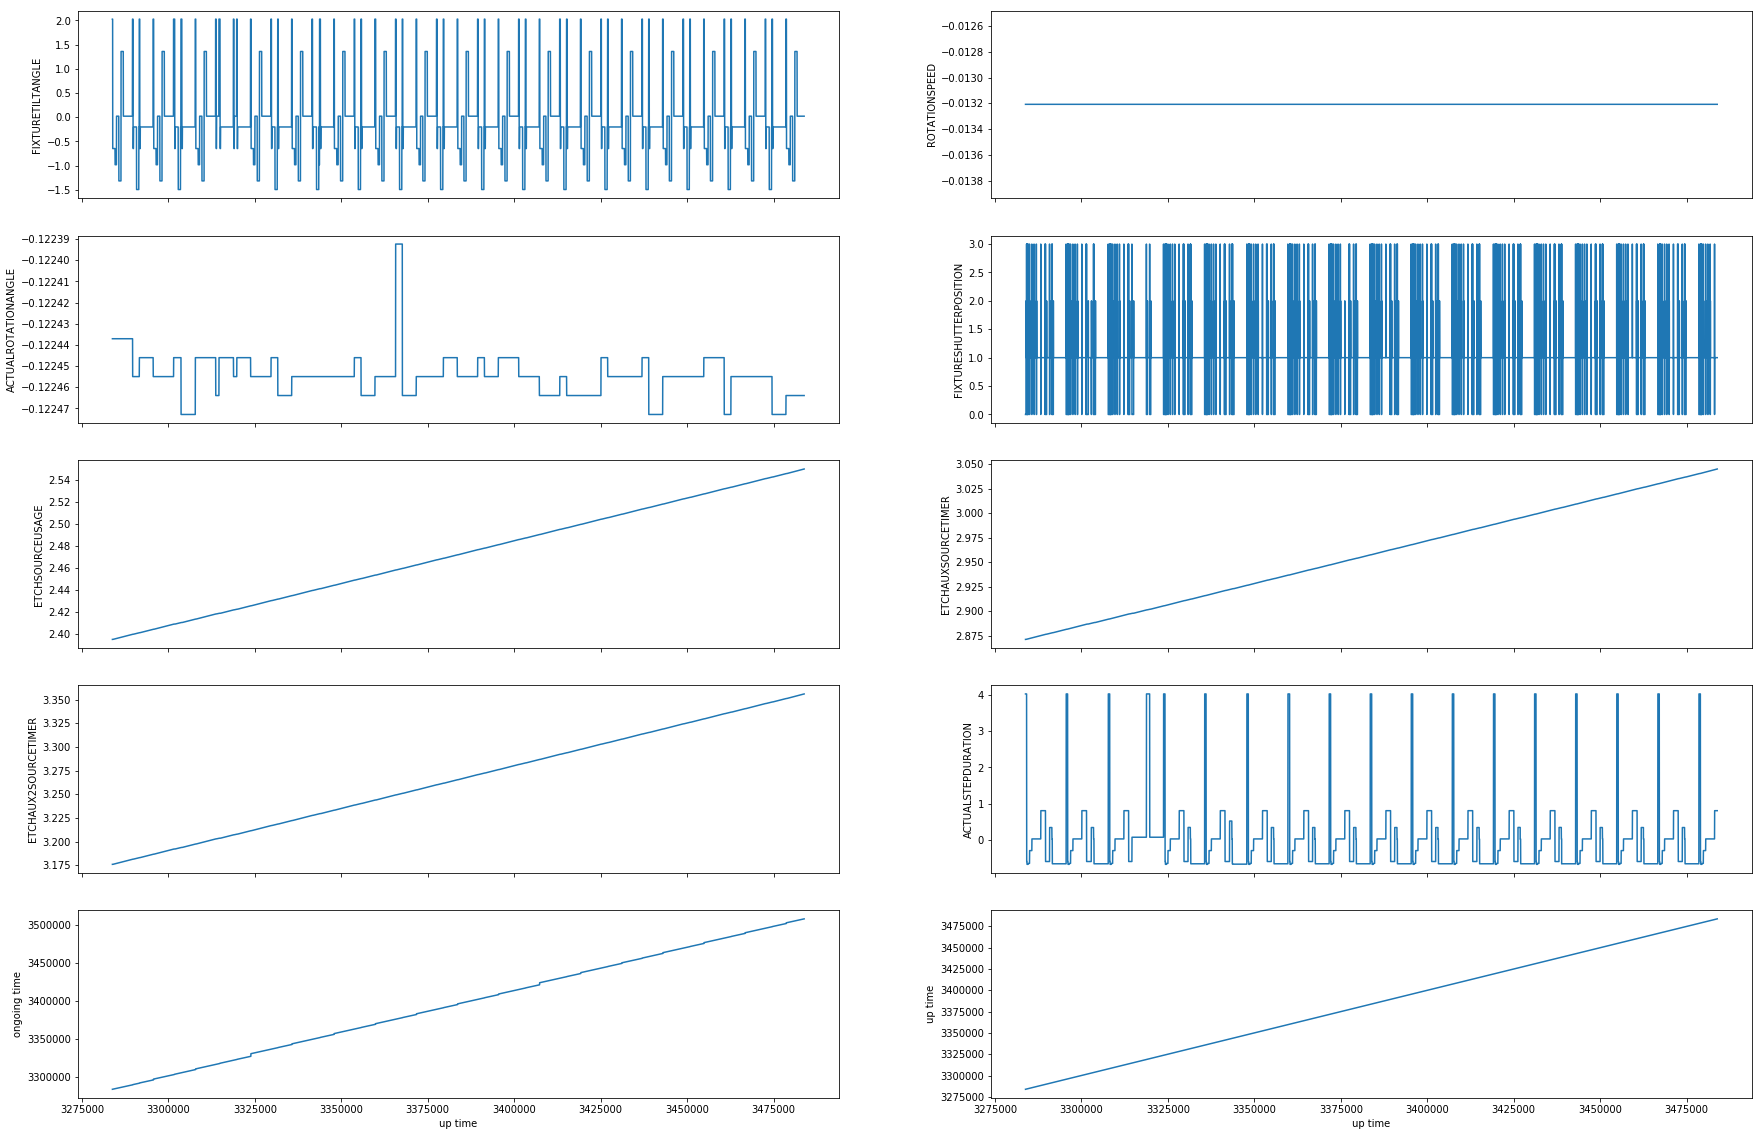

In [10]:
fig, axes = plt.subplots(5, 2, figsize=(30,20), sharex=True) # , dpi=200, 
ax = axes.ravel()
plt.subplots_adjust(hspace=0.2, wspace=0.6)
for i in range(16,26):
    sns.lineplot(x=df_original["up time"], y=df_original.iloc[:,i], ax=ax[i-16])
#plt.savefig("../graphs/raw_sensor_data.png")
#ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
#fig.tight_layout()
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()

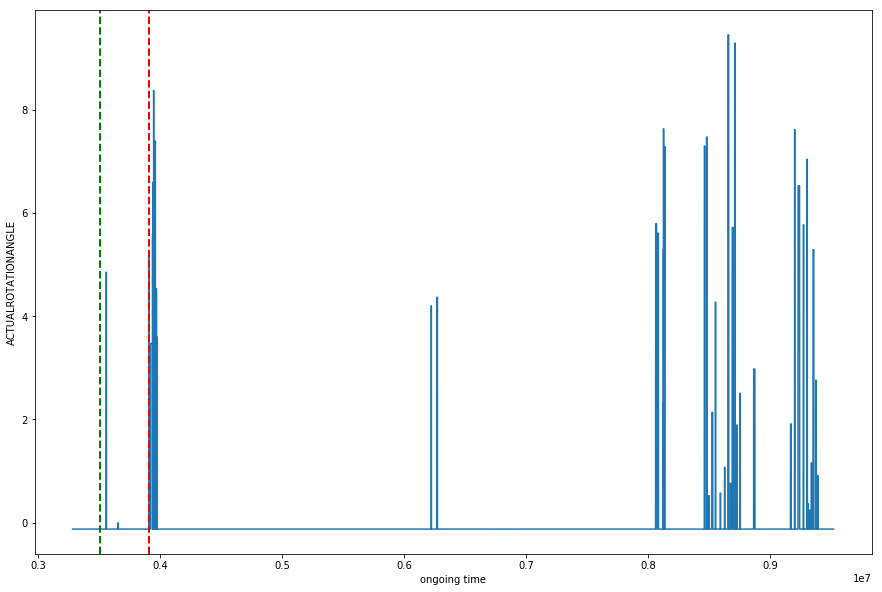

In [16]:
fig, axes = plt.subplots(1,1, figsize=(15,10))
sns.lineplot(x=df_original["ongoing time"], y=df_original.iloc[:,18])
axes.axvline(3507554, 0,2, color="g", linestyle ="--", linewidth=2)
axes.axvline(3907068, 0,2, color="r", linestyle ="--", linewidth=2)
plt.show()

## Correlation of sensor time series

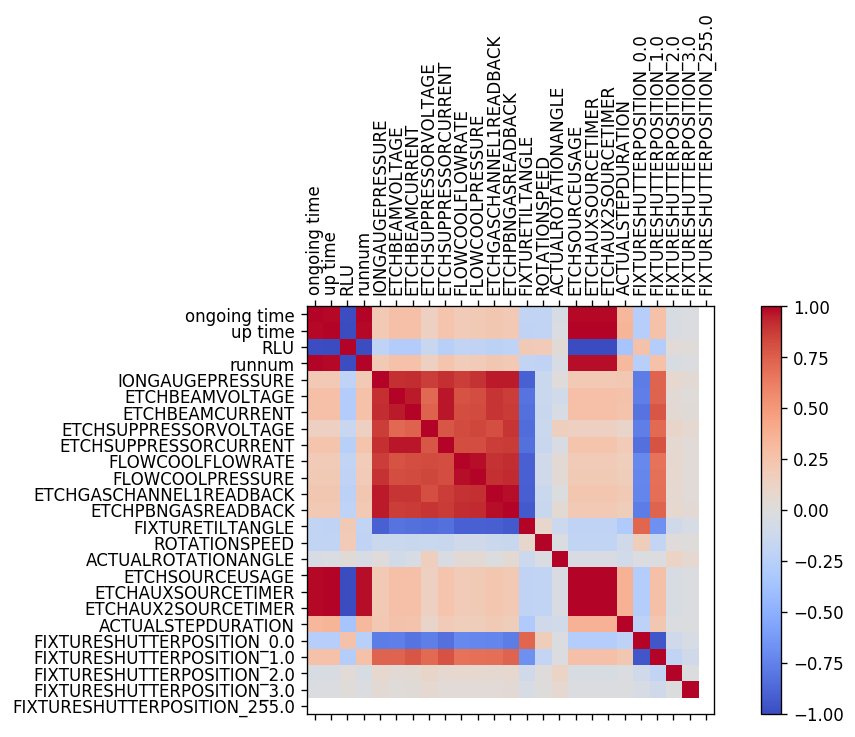

In [16]:
corr = df_original.corr()
fig = plt.figure(figsize=(10,4.5), dpi=120)
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df_original.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df_original.columns)
ax.set_yticklabels(df_original.columns)
plt.show()

## Autocorrelation

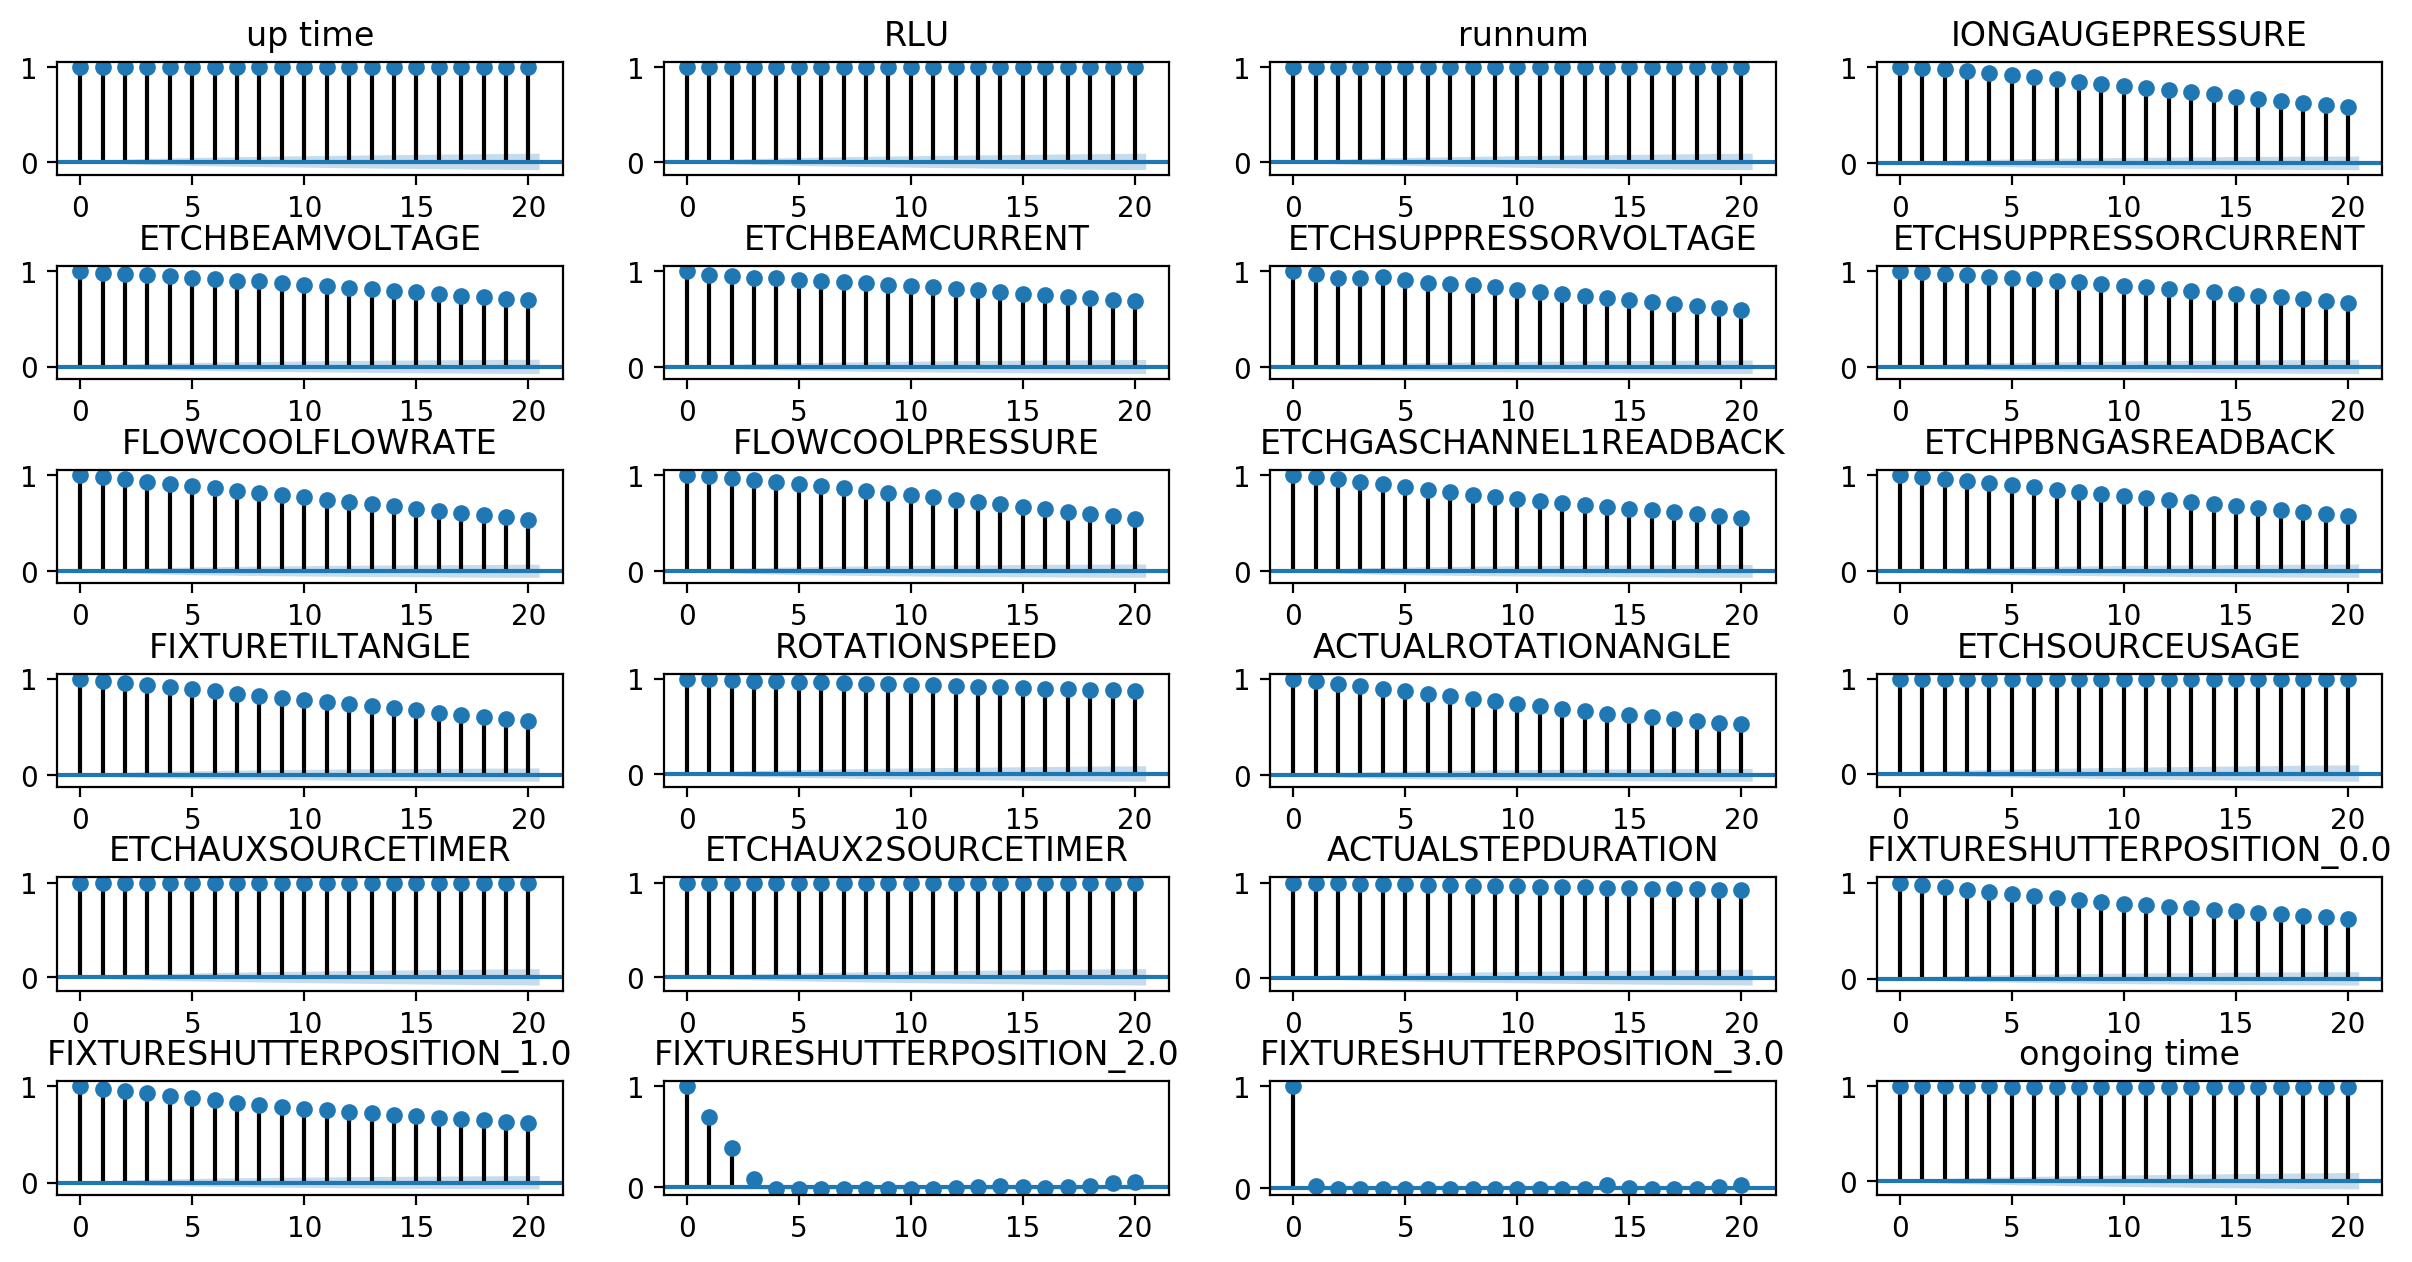

In [22]:
fig, axes = plt.subplots(6, 4, figsize=(15,7.5), dpi=200)
ax = axes.ravel()
plt.subplots_adjust(hspace=0.2, wspace=0.4)
for i in range(0,24):
    plot_acf(df_original.iloc[:,i], lags=20, ax=ax[i-1])
    ax[i-1].set_title(df_original.columns[i])
#plt.savefig("../graphs/raw_sensor_data_autocorrelation.png")
plt.subplots_adjust(wspace=0.2, hspace=0.8)
plt.show()

## Histogramm 

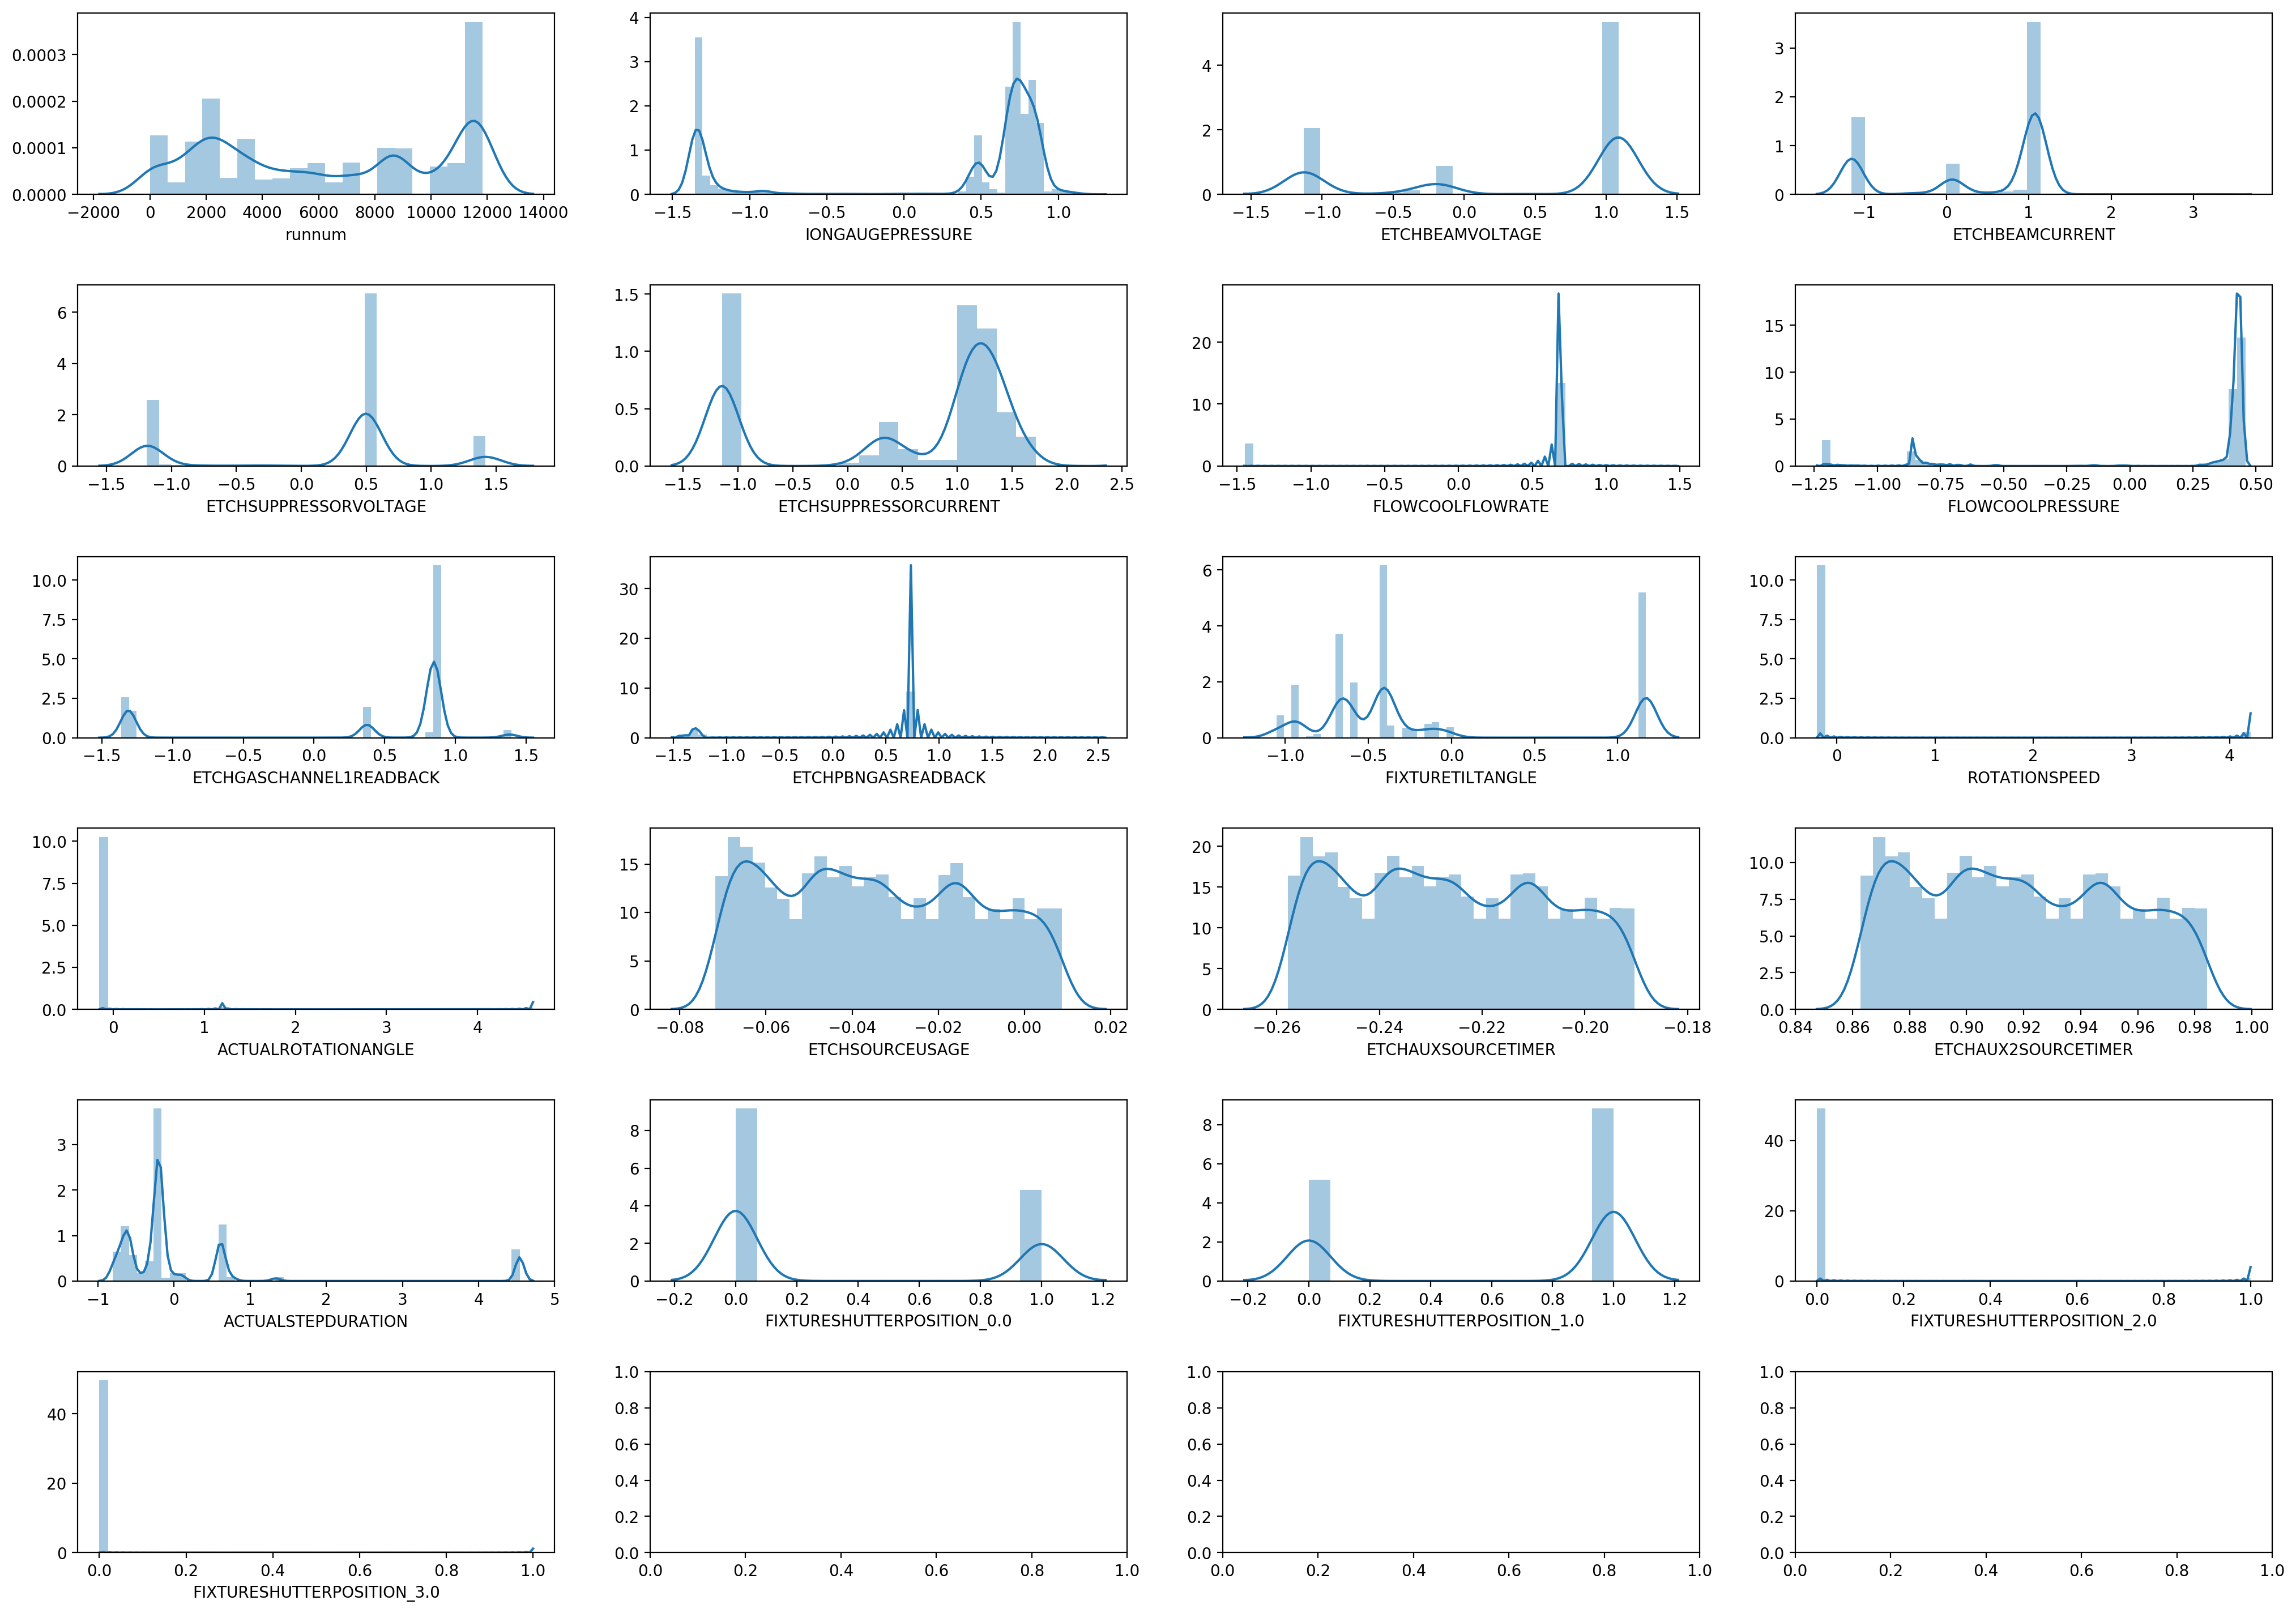

In [33]:
fig, axes = plt.subplots(6, 4, figsize=(25,18), dpi=200)
ax = axes.ravel()
plt.subplots_adjust(hspace=0.2, wspace=0.4)
for i in range(3, 24):
    sns.distplot(df_original.iloc[:,i], ax=ax[i-3])
#plt.savefig("../graphs/raw_sensor_data_histogramm.png")
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()